<a href="https://colab.research.google.com/github/vik-sin/Students-Performance/blob/master/StudentsPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
# reading dataset from github
df= pd.read_csv("https://github.com/vik-sin/StudentsPerformance/raw/master/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [0]:
df= df.rename(columns= {'gender': 'Gender', 'race/ethnicity': 'RaceEthnicity',  'parental level of education': 'ParentalEducation' ,'lunch': 'Lunch' , 'test preparation course': 'TestPrepCourse' , 'math score':'MathsScore', 'reading score': 'ReadingScore' , 'writing score': 'WritingScore'})

In [73]:
df.head()

,Gender,RaceEthnicity,ParentalEducation,Lunch,TestPrepCourse,MathsScore,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [74]:
data= df.iloc[0: , 5:]
data.head()

,MathsScore,ReadingScore,WritingScore
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


# **Applying Clustering Algorithms**





## 1. K-Means Clustering

In [0]:
from sklearn.cluster import KMeans

wcss = []
kValueRange = range(1,12)
for k in kValueRange:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(data)
    wcss.append(km.inertia_)

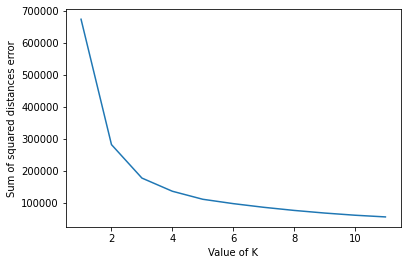

In [76]:
plt.xlabel('Value of K')
plt.ylabel('Sum of squared distances error')
plt.plot(kValueRange,wcss)

In [77]:
for i in range(1,len(wcss)):
    val= wcss[i]- wcss[i-1]
    print(("%d to %d is %d")%(i-1, i,-val))

0 to 1 is 391366
1 to 2 is 104457
2 to 3 is 41129
3 to 4 is 25053
4 to 5 is 13585
5 to 6 is 11460
6 to 7 is 9743
7 to 8 is 8178
8 to 9 is 6806
9 to 10 is 5297


In [78]:
# After k=5, value of squared error is decreasing.
# Hence, we are going to use k=5
km=KMeans(n_clusters=5, n_init=20)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [79]:
print("Size of km.labels_ : ",km.labels_.size)
print("Count of values :")
pd.Series(km.labels_).value_counts()

Size of km.labels_ :  1000
Count of values :


3    287
2    271
4    218
0    165
1     59
dtype: int64

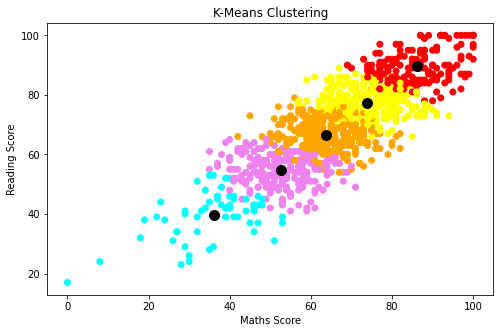

In [80]:
#plotting datapoints
colors= ['red', 'cyan', 'yellow', 'orange', 'violet']
labels= ['Cluster1' ,'Cluster2', 'Cluster3', 'Cluster4','Cluster5']

colorLabel= [colors[km.labels_[i]] for i in range(len(km.labels_)) ]

plt.figure(figsize=(8,5))
plt.scatter(data['MathsScore'], data['ReadingScore'], color= colorLabel,marker='o')

#plotting centres of clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, c='black', marker='o')
plt.title("K-Means Clustering")
plt.xlabel("Maths Score")
plt.ylabel('Reading Score')
plt.show()

## 2. Hierarchical Clustering

In [0]:
import scipy.cluster.hierarchy as sch

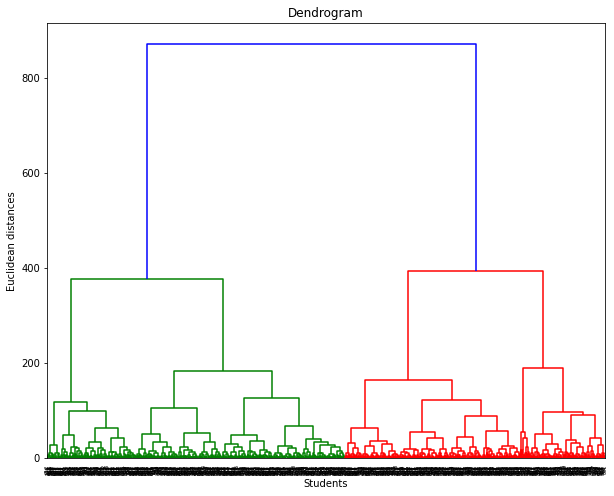

In [82]:
plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Students')
plt.ylabel('Euclidean distances')
plt.show()

In [0]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='complete')

In [84]:
hc.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=4)

In [0]:
y_hc=hc.fit_predict(data)
# y_hc

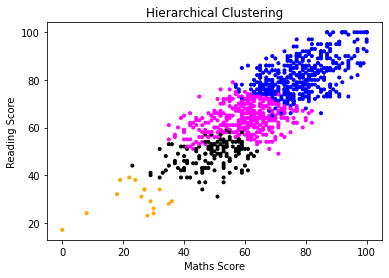

In [86]:
# Plotting Graph
colors= ['blue', 'magenta', 'orange', 'black']
labels= ['Cluster1' ,'Cluster2', 'Cluster3', 'Cluster4']

colorLabel= [colors[hc.labels_[i]] for i in range(len(hc.labels_)) ]

plt.scatter(data['MathsScore'], data['ReadingScore'], color= colorLabel, marker='.')
plt.title("Hierarchical Clustering")
plt.xlabel("Maths Score")
plt.ylabel('Reading Score')
plt.show()

# DBSCAN Clustering

In [87]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, metric='euclidean', min_samples=100)
dbscan.fit(data)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=100, n_jobs=None, p=None)

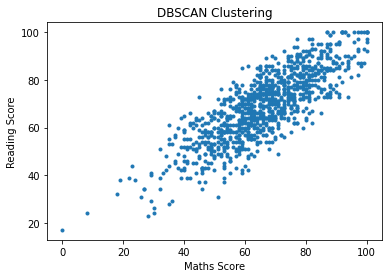

In [88]:
colorLabel= [colors[dbscan.labels_[i]] for i in range(len(dbscan.labels_)) ]

plt.scatter(data['MathsScore'], data['ReadingScore'], marker='.')
plt.title("DBSCAN Clustering")
plt.xlabel("Maths Score")
plt.ylabel('Reading Score')
plt.show()

# **Graphs**

## Graph-1: Gender (grouped on the basis of race)

In [89]:
df.head()

,Gender,RaceEthnicity,ParentalEducation,Lunch,TestPrepCourse,MathsScore,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [90]:
g1= pd.DataFrame(df['RaceEthnicity'].unique())
g1.rename(columns= {0:'Race'}, inplace=True)
g1

,Race
0,group B
1,group C
2,group A
3,group D
4,group E


In [91]:
l= [list ( df.loc[df.RaceEthnicity==r,'Gender'].value_counts() ) for r in g1['Race'] ]
l

[[104, 86], [180, 139], [53, 36], [133, 129], [71, 69]]

In [0]:
g2= pd.DataFrame(l)
g2.rename(columns= {0:'Male', 1:'Female'}, inplace=True)

In [93]:
newDf= pd.concat([g1, g2], axis=1)
newDf.sort_values(by="Race", inplace=True)
newDf.rename(index={2:1, 0:2, 1:3, 3:4, 4:5}, inplace= True)
newDf

,Race,Male,Female
1,group A,53,36
2,group B,104,86
3,group C,180,139
4,group D,133,129
5,group E,71,69


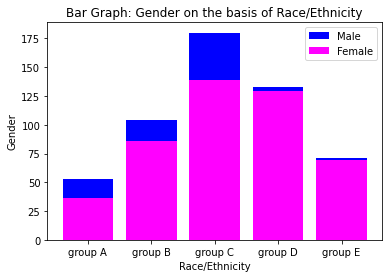

In [94]:
plt.bar(newDf['Race'], newDf['Male'], color='blue', label="Male")
plt.bar(newDf['Race'], newDf['Female'], color='magenta', label="Female")
plt.title("Bar Graph: Gender on the basis of Race/Ethnicity")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Gender")
plt.legend()
plt.show()

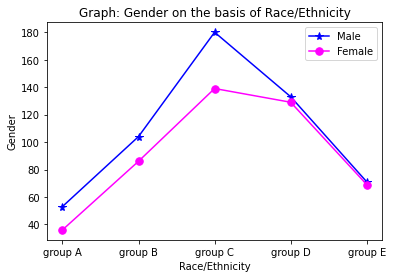

In [95]:
plt.plot(newDf['Race'], newDf['Male'], color='blue', label="Male", marker='*', markersize=8)
plt.plot(newDf['Race'], newDf['Female'], color='magenta', label="Female", marker='.',markersize=15)
plt.title("Graph: Gender on the basis of Race/Ethnicity")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Gender")
plt.legend()
plt.show()

## Graph-2: Race (grouped on the basis of Gender)

In [96]:
newDf.sort_values(by="Male", inplace=True, ascending= False)
newDf.rename(index={2:1, 4:2, 0:3, 1:4, 3:5}, inplace= True)
newDf

,Race,Male,Female
5,group C,180,139
2,group D,133,129
1,group B,104,86
5,group E,71,69
4,group A,53,36


In [0]:
gender= pd.Series(['Male', 'Female'])


In [98]:
male= [i for i in newDf['Male']]
female= [i for i in newDf['Female']]
newDf.shape[0]

5

In [99]:
female

[139, 129, 86, 69, 36]

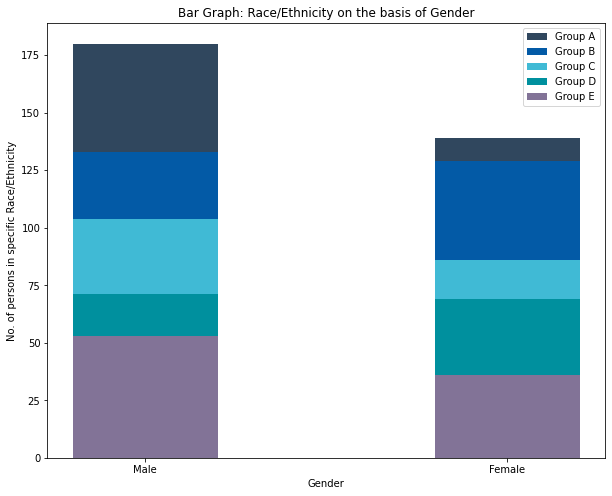

In [165]:
male= [i for i in newDf['Male']]
female= [i for i in newDf['Female']]
color= ['#30475e', '#035aa6','#40bad5', '#00909e', '#827397']
labels= ['Group A', 'Group B', 'Group C', 'Group D', 'Group E']
n= newDf.shape[0]
plt.figure(figsize=(10,8))  

for i in range(n):
  plt.bar(gender[0],male[i], color= color[i], width= 0.4)
  plt.bar(gender[1],female[i], color= color[i], label= labels[i], width= 0.4)

plt.title("Bar Graph: Race/Ethnicity on the basis of Gender")
plt.ylabel("No. of persons in specific Race/Ethnicity")
plt.xlabel("Gender")
plt.legend()
plt.show()

## Graph-3

In [101]:
df['ParentalEducation'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: ParentalEducation, dtype: int64

In [102]:
x= pd.DataFrame(df['ParentalEducation'].unique())
x.rename(columns= {0:'ParentalEducation'}, inplace=True)
x

,ParentalEducation
0,bachelor's degree
1,some college
2,master's degree
3,associate's degree
4,high school
5,some high school


In [114]:
lst= [list ( df.loc[df.ParentalEducation==r,'Gender'].value_counts() ) for r in x['ParentalEducation'] ]
lst

[[63, 55], [118, 108], [36, 23], [116, 106], [102, 94], [91, 88]]

In [115]:
y= pd.DataFrame(lst)
y.rename(columns= {0:'Male', 1:'Female'}, inplace=True)
y

,Male,Female
0,63,55
1,118,108
2,36,23
3,116,106
4,102,94
5,91,88


In [120]:
gender

0      Male
1    Female
dtype: object

In [121]:
z= pd.concat([x,y], axis=1)
z.sort_values(by="Male", inplace=True, ascending=False)
z.rename(index={1:1, 3:2, 4:3, 5:4, 0:5, 2:6}, inplace= True)
z

,ParentalEducation,Male,Female
1,some college,118,108
2,associate's degree,116,106
3,high school,102,94
4,some high school,91,88
5,bachelor's degree,63,55
6,master's degree,36,23


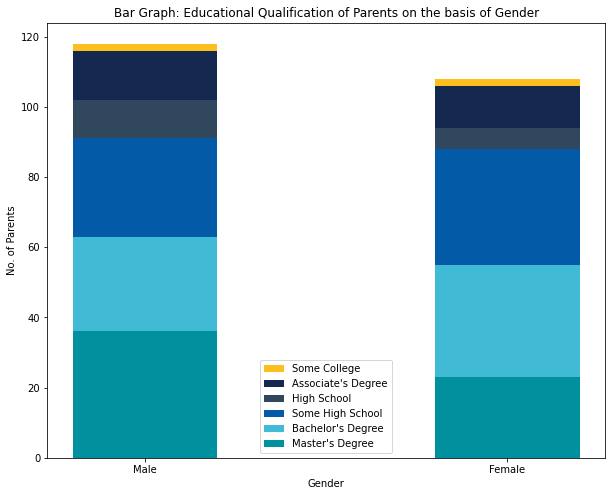

In [140]:
peMale= [i for i in z['Male']]
peFemale= [i for i in z['Female']]
color= ['#fcbf1e', '#142850', '#30475e', '#035aa6','#40bad5', '#00909e', '#dae1e7']
labels= ['Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"]
n= z.shape[0]
plt.figure(figsize=(10,8))  

for i in range(n):
  plt.bar(gender[0], peMale[i], color= color[i], width= 0.4)
  plt.bar(gender[1], peFemale[i], color= color[i], label= labels[i], width= 0.4)

plt.title("Bar Graph: Educational Qualification of Parents on the basis of Gender")
plt.ylabel("No. of Parents")
plt.xlabel("Gender")
plt.legend()
plt.show()

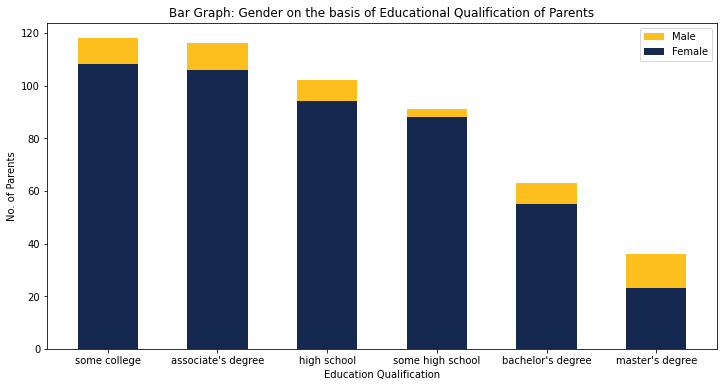

In [157]:
plt.figure(figsize=(12,6))
plt.bar(z['ParentalEducation'], z['Male'], color='#fcbf1e', label="Male", width=0.55)
plt.bar(z['ParentalEducation'], z['Female'], color= '#142850', label="Female", width=0.55)
plt.title("Bar Graph: Gender on the basis of Educational Qualification of Parents")
plt.ylabel("No. of Parents")
plt.xlabel("Education Qualification")
plt.legend()
plt.legend()
plt.show()